In [3]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.2 ms (started: 2021-06-26 10:40:36 +00:00)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import arviz as az

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

time: 8.06 s (started: 2021-06-26 10:40:40 +00:00)


In [13]:
import tensorflow as tf

time: 45.7 s (started: 2021-06-26 10:44:44 +00:00)


## Read files

In [5]:
path = "/home/ubuntu/kmexis/fotini/inputs.xlsx"
inputs = pd.read_excel(path)
inputs

ALL_E_1   ALL_E_2   ALL_LCOL  ALL_Q_MAX  ALL_Q_SENS_1  ALL_Q_SENS_2  \
0      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
1      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
2      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
3      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
4      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
...         ...       ...        ...        ...           ...           ...   
14658  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14659  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14660  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14661  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14662  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   

       ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  ALL_SPCE_1_4_1  ...  \
0            0.563438    8.543496e-02    1.717066e-02    6.322206e-07  ...   
1            0.564451    8.466281e-02    2.905807e-02    1.612620e-06  ...   
2            0.566313    7.832914e-02    4.802137e-02    4.036888e-06  ...   
3            0.571410    6.752206e-02    7.818277e-02    1.006441e-05  ...   
4            0.581038    5.349233e-02    1.279746e-01    2.608407e-05  ...   
...               ...             ...             ...             ...  ...   
14658        0.422856    6.487419e-09    1.306235e-15    6.395148e-14  ...   
14659        0.424128    1.190282e-08    1.238555e-15    6.192088e-14  ...   
14660        0.425468    2.186053e-08    1.171234e-15    5.985949e-14  ...   
14661        0.426815    4.017112e-08    1.104526e-15    5.777195e-14  ...   
14662        0.428164    7.382999e-08    1.038707e-15    5.566414e-14  ...   

       ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  ALL_SPC_1_1_1  ALL_SPC_1_2_1  \
0        3.267351e-06    5.097847e-03       0.563424   8.529911e-02   
1        7.447066e-07    2.227611e-03       0.564439   8.480581e-02   
2        4.323652e-08    3.645484e-04       0.566283   7.868749e-02   
3        1.249398e-09    5.785877e-07       0.571336   6.804240e-02   
4        1.362521e-08    1.603492e-10       0.580926   5.412120e-02   
...               ...             ...            ...            ...   
14658    4.803168e-02    2.144490e-04       0.422844   6.327573e-09   
14659    8.602525e-02    5.536509e-04       0.424114   1.160900e-08   
14660    1.373932e-01    1.272117e-03       0.425454   2.132021e-08   
14661    1.981678e-01    2.642789e-03       0.426801   3.917766e-08   
14662    2.597403e-01    4.988145e-03       0.428151   7.200418e-08   

       ALL_SPC_1_3_1  ALL_SPC_1_4_1  ALL_SPC_2_1_1  ALL_SPC_2_2_1  \
0       1.664498e-02   5.988277e-07       0.687950   2.880853e-23   
1       2.844474e-02   1.552307e-06       0.707030   1.396225e-21   
2       4.705688e-02   3.889567e-06       0.910255   1.053715e-11   
3       7.662721e-02   9.690975e-06       1.467872   3.509466e-08   
4       1.253729e-01   2.506206e-05       1.891948   6.335367e-07   
...              ...            ...            ...            ...   
14658   1.309060e-15   6.403537e-14       0.602009   1.006856e-01   
14659   1.241369e-15   6.200610e-14       0.605812   5.134115e-02   
14660   1.174029e-15   5.994592e-14       0.608941   2.344860e-02   
14661   1.107290e-15   5.785936e-14       0.611419   9.704472e-03   
14662   1.041429e-15   5.575228e-14       0.613521   3.671428e-03   

       ALL_SPC_2_3_1  ALL_SPC_2_4_1  
0       3.467715e-06   5.264804e-03  
1       7.997385e-07   2.318216e-03  
2       5.372676e-08   4.240466e-04  
3       1.085604e-09   8.770652e-07  
4       1.284046e-08   2.375659e-10  
...              ...            ...  
14658   4.732883e-02   2.096068e-04  
14659   8.418414e-02   5.339192e-04  
14660   1.350270e-01   1.231820e-03  
14661   1.955508e-01   2.569345e-03  
14662   2.572876e-01  

time: 3min 38s (started: 2021-06-26 10:40:49 +00:00)


In [6]:
X = inputs[['ALL_SPCE_1_1_1','ALL_SPCE_1_2_1','ALL_SPCE_1_3_1','ALL_SPCE_1_4_1',
      'ALL_SPCE_2_1_1','ALL_SPCE_2_2_1','ALL_SPCE_2_3_1','ALL_SPCE_2_4_1']]
X.head()

ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  ALL_SPCE_1_4_1  \
0        0.563438        0.085435        0.017171    6.322206e-07   
1        0.564451        0.084663        0.029058    1.612620e-06   
2        0.566313        0.078329        0.048021    4.036888e-06   
3        0.571410        0.067522        0.078183    1.006441e-05   
4        0.581038        0.053492        0.127975    2.608407e-05   

   ALL_SPCE_2_1_1  ALL_SPCE_2_2_1  ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  
0        0.687977    2.510892e-23    3.267351e-06    5.097847e-03  
1        0.707637    3.310449e-21    7.447066e-07    2.227611e-03  
2        0.914227    1.645853e-11    4.323652e-08    3.645484e-04  
3        1.474020    4.163026e-08    1.249398e-09    5.785877e-07  
4        1.893482    6.809961e-07    1.362521e-08    1.603492e-10

time: 244 ms (started: 2021-06-26 10:44:28 +00:00)


In [7]:
y = inputs[['ALL_SPC_1_1_1','ALL_SPC_1_2_1','ALL_SPC_1_3_1','ALL_SPC_1_4_1',
            'ALL_SPC_2_1_1','ALL_SPC_2_2_1','ALL_SPC_2_3_1','ALL_SPC_2_4_1']]
y.head()

ALL_SPC_1_1_1  ALL_SPC_1_2_1  ALL_SPC_1_3_1  ALL_SPC_1_4_1  ALL_SPC_2_1_1  \
0       0.563424       0.085299       0.016645   5.988277e-07       0.687950   
1       0.564439       0.084806       0.028445   1.552307e-06       0.707030   
2       0.566283       0.078687       0.047057   3.889567e-06       0.910255   
3       0.571336       0.068042       0.076627   9.690975e-06       1.467872   
4       0.580926       0.054121       0.125373   2.506206e-05       1.891948   

   ALL_SPC_2_2_1  ALL_SPC_2_3_1  ALL_SPC_2_4_1  
0   2.880853e-23   3.467715e-06   5.264804e-03  
1   1.396225e-21   7.997385e-07   2.318216e-03  
2   1.053715e-11   5.372676e-08   4.240466e-04  
3   3.509466e-08   1.085604e-09   8.770652e-07  
4   6.335367e-07   1.284046e-08   2.375659e-10

time: 207 ms (started: 2021-06-26 10:44:28 +00:00)


# Taking a look at data 

In [8]:
X.describe()

ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  ALL_SPCE_1_4_1  \
count    14663.000000    1.466300e+04    1.466300e+04    1.466300e+04   
mean         0.635476    3.005268e-02    1.831368e-01    2.013413e-02   
std          0.288546    9.894182e-02    4.953198e-01    6.064496e-02   
min          0.244421  -1.000000e-300  -1.000000e-300  -1.000000e-300   
25%          0.493538    8.211038e-11    2.200535e-11    7.446550e-13   
50%          0.586623    1.435335e-05    3.656299e-05    3.111641e-07   
75%          0.688346    1.219501e-02    9.306647e-02    9.138178e-03   
max          2.324910    1.753896e+00    7.538110e+00    8.256351e-01   

       ALL_SPCE_2_1_1  ALL_SPCE_2_2_1  ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  
count    14663.000000    1.466300e+04    1.466300e+04    1.466300e+04  
mean         0.636598    3.012237e-02    1.852281e-01    2.042035e-02  
std          0.289368    1.006641e-01    5.073499e-01    6.212573e-02  
min          0.244433  -1.000000e-300  -1.000000e-300  -1.000000e-300  
25%          0.494594    7.373166e-11    2.179450e-11    7.559760e-13  
50%          0.587518    1.358132e-05    3.639787e-05    3.274161e-07  
75%          0.688899    1.201865e-02    9.321074e-02    9.146568e-03  
max          2.324899    1.782715e+00    7.845835e+00    8.373920e-01

time: 473 ms (started: 2021-06-26 10:44:29 +00:00)


In [9]:
y.describe()

ALL_SPC_1_1_1  ALL_SPC_1_2_1  ALL_SPC_1_3_1  ALL_SPC_1_4_1  \
count   14663.000000   1.466300e+04   1.466300e+04   1.466300e+04   
mean        0.635477   3.004627e-02   1.831234e-01   2.012738e-02   
std         0.288544   9.888382e-02   4.952544e-01   6.063838e-02   
min         0.244425 -1.000000e-300 -1.000000e-300 -1.000000e-300   
25%         0.493400   8.340739e-11   2.455481e-11   7.717221e-13   
50%         0.586660   1.428482e-05   3.483515e-05   3.168238e-07   
75%         0.688318   1.201870e-02   9.279388e-02   8.939414e-03   
max         2.318533   1.752356e+00   7.549309e+00   8.258429e-01   

       ALL_SPC_2_1_1  ALL_SPC_2_2_1  ALL_SPC_2_3_1  ALL_SPC_2_4_1  
count   14663.000000   1.466300e+04   1.466300e+04   1.466300e+04  
mean        0.636595   3.011944e-02   1.852237e-01   2.041332e-02  
std         0.289359   1.006278e-01   5.072905e-01   6.211885e-02  
min         0.244437 -1.000000e-300 -1.000000e-300 -1.000000e-300  
25%         0.494531   7.378653e-11   2.420378e-11   7.731599e-13  
50%         0.587667   1.346272e-05   3.482898e-05   3.288474e-07  
75%         0.688888   1.188308e-02   9.285689e-02   8.966112e-03  
max         2.318523   1.781309e+00   7.866252e+00   8.376062e-01

time: 657 ms (started: 2021-06-26 10:44:29 +00:00)


# Preprocessing 

In [49]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42, shuffle=True)

time: 2.2 s (started: 2021-06-26 17:19:42 +00:00)


In [50]:
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0.1,1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print((X_train_scaled.shape, y_train.shape))

print((X_test_scaled.shape, y_test.shape))

((11730, 8), (11730, 8))
((2933, 8), (2933, 8))
time: 2.32 s (started: 2021-06-26 17:19:46 +00:00)


In [51]:
# y_scaler = StandardScaler()
# # y_scaler = MinMaxScaler(feature_range=(1000,1001))

# y_train_scaled = y_scaler.fit_transform(y_train)
# # y_test_scaled = y_scaler.fit_transform(y_test)

# print((X_train_scaled.shape, y_train_scaled.shape))

# print((X_test_scaled.shape, y_test.shape))

time: 583 µs (started: 2021-06-26 17:19:49 +00:00)


## ANN 

In [52]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(25, input_dim=8, kernel_initializer='truncated_normal',
                                activation='softmax'))
model.add(tf.keras.layers.Dense(50, activation='softmax'))
model.add(tf.keras.layers.Dense(25, activation='softmax'))
model.add(tf.keras.layers.Dense(8, activation='linear'))

model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mse'])

time: 5.82 s (started: 2021-06-26 17:19:49 +00:00)


In [53]:
# history = model.fit(X_train_scaled, y_train_scaled, validation_split=.2, 
#                     verbose=10, epochs=100, batch_size=512)

history = model.fit(X_train_scaled, y_train, validation_split=.2, 
                    verbose=10, epochs=500, batch_size=512)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

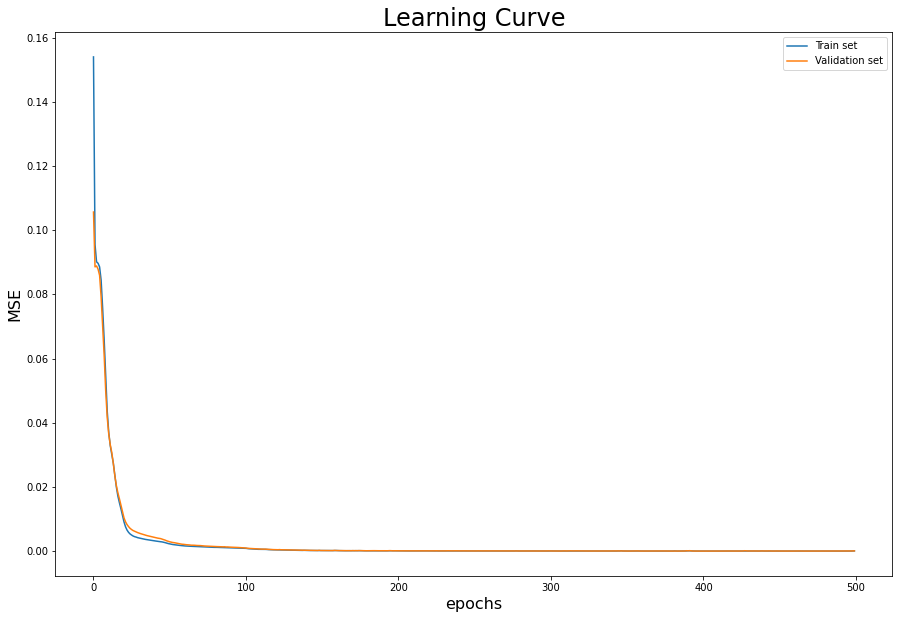

time: 12.7 s (started: 2021-06-26 17:43:51 +00:00)


In [54]:
# plot loss during training
plt.figure(figsize=(15,10))

plt.title('Learning Curve', fontsize=24)
plt.plot(history.history['loss'], label='Train set')
plt.plot(history.history['val_loss'], label='Validation set')
plt.legend()
plt.ylabel('MSE', fontsize=16)
plt.xlabel('epochs', fontsize=16)
plt.show()

In [57]:
# newX = asarray([row])
yhat = model.predict(X_test_scaled)
# yhat = y_scaler.inverse_transform(yhat)

time: 6.37 s (started: 2021-06-26 17:45:45 +00:00)


In [58]:
yhat = pd.DataFrame(yhat)

yhat[yhat<0.0009]=0
yhat

0         1    2         3         4         5         6  \
0     0.525284  0.179603  0.0  0.000000  2.036338  0.003493  0.003277   
1     0.607448  0.110076  0.0  0.002433  0.498817  0.006259  0.006674   
2     0.794844  0.008874  0.0  0.000000  0.489344  0.017717  0.220679   
3     0.671392  0.010129  0.0  0.000000  0.563663  0.002835  0.777228   
4     0.407233  0.004291  0.0  0.002280  0.513435  0.002777  0.007254   
...        ...       ...  ...       ...       ...       ...       ...   
2928  0.588255  0.028815  0.0  0.003568  0.381781  0.003370  0.005932   
2929  0.541568  0.007105  0.0  0.002153  0.761595  0.000995  0.008938   
2930  0.529793  0.184344  0.0  0.004219  1.192353  0.004509  0.006215   
2931  0.745720  0.007422  0.0  0.002033  0.366846  0.004475  0.437352   
2932  0.639286  0.006552  0.0  0.004032  0.558096  0.006312  0.164576   

             7  
0     0.000000  
1     0.000000  
2     0.058251  
3     0.131975  
4     0.000000  
...        ...  
2928  0.000000  
2929  0.000000  
2930  0.001581  
2931  0.044970  
2932  0.003937  

[2933 rows x 8 columns]

time: 969 ms (started: 2021-06-26 17:45:52 +00:00)


In [59]:
y_test.reset_index(inplace=True)
y_test = y_test.drop('index',axis=1)
y_test

ALL_SPC_1_1_1  ALL_SPC_1_2_1  ALL_SPC_1_3_1  ALL_SPC_1_4_1  \
0          0.527259   1.965165e-01   2.752861e-03   1.934003e-07   
1          0.605870   1.101945e-01   8.757808e-03   2.294124e-05   
2          0.786287   1.019956e-41   3.627868e-20   1.556201e-14   
3          0.662410   1.625902e-44   4.828204e-17   1.624920e-11   
4          0.401719   7.701362e-13   3.616175e-15   7.209781e-14   
...             ...            ...            ...            ...   
2928       0.582903   2.373038e-02   4.748183e-08   5.220252e-12   
2929       0.538234   1.095103e-05   1.416151e-13   1.959040e-13   
2930       0.531297   1.897730e-01   3.434456e-06   6.441967e-10   
2931       0.746370   1.077359e-12   9.452048e-04   1.022693e-02   
2932       0.637765   2.817759e-25   3.321760e-07   9.770052e-05   

      ALL_SPC_2_1_1  ALL_SPC_2_2_1  ALL_SPC_2_3_1  ALL_SPC_2_4_1  
0          2.050439   1.268962e-13   1.197662e-16   5.749854e-14  
1          0.499898   3.804150e-07   4.136566e-10   9.890469e-09  
2          0.492356   1.188206e-02   2.151973e-01   5.925311e-02  
3          0.566758   1.055895e-03   7.535986e-01   1.404780e-01  
4          0.516120   1.654129e-04   1.818720e-11   1.214056e-14  
...             ...            ...            ...            ...  
2928       0.380430   6.850563e-18   4.819624e-19   1.733485e-17  
2929       0.766286   1.223970e-14   9.968641e-14   8.009662e-13  
2930       1.208434   4.800791e-07   1.397447e-16   3.190147e-16  
2931       0.380313   5.443596e-04   4.185582e-01   4.954949e-02  
2932       0.559658   1.740395e-03   1.584525e-01   1.508751e-03  

[2933 rows x 8 columns]

time: 1.13 s (started: 2021-06-26 17:45:53 +00:00)


In [60]:
yhat.max(0)

0    2.328085
1    1.610612
2    4.795940
3    0.788551
4    2.297807
5    1.658925
6    6.385251
7    0.783515
dtype: float32

time: 86.5 ms (started: 2021-06-26 17:46:01 +00:00)


In [61]:
y_test.max(0)

ALL_SPC_1_1_1    2.318501
ALL_SPC_1_2_1    1.679731
ALL_SPC_1_3_1    4.808797
ALL_SPC_1_4_1    0.799316
ALL_SPC_2_1_1    2.318446
ALL_SPC_2_2_1    1.634228
ALL_SPC_2_3_1    6.344785
ALL_SPC_2_4_1    0.780955
dtype: float64

time: 21.5 ms (started: 2021-06-26 17:46:04 +00:00)


In [62]:
results = {'ALL_SPC_1_1_1': mean_absolute_error(y_test['ALL_SPC_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': mean_absolute_error(y_test['ALL_SPC_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': mean_absolute_error(y_test['ALL_SPC_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": mean_absolute_error(y_test['ALL_SPC_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': mean_absolute_error(y_test['ALL_SPC_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': mean_absolute_error(y_test['ALL_SPC_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': mean_absolute_error(y_test['ALL_SPC_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': mean_absolute_error(y_test['ALL_SPC_2_4_1'], yhat[7])}

results

{'ALL_SPC_1_1_1': 0.005645281301226728,
 'ALL_SPC_1_2_1': 0.006328846756895782,
 'ALL_SPC_1_3_1': 0.006569435034531336,
 'ALL_SPC_1_4_1': 0.0023369439075166623,
 'ALL_SPC_2_1_1': 0.004783979921870154,
 'ALL_SPC_2_2_1': 0.0036637569201308133,
 'ALL_SPC_2_3_1': 0.01143563814639064,
 'ALL_SPC_2_4_1': 0.0017876913508404998}

time: 399 ms (started: 2021-06-26 17:46:06 +00:00)


In [63]:
results = {'ALL_SPC_1_1_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_1_1_1'], yhat[0])),
        'ALL_SPC_1_2_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_1_2_1'], yhat[1])),
        'ALL_SPC_1_3_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_1_3_1'], yhat[2])),
        "ALL_SPC_1_4_1": np.sqrt(mean_squared_error(y_test['ALL_SPC_1_4_1'], yhat[3])),
        'ALL_SPC_2_1_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_1_1'], yhat[4])),
        'ALL_SPC_2_2_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_2_1'], yhat[5])),
        'ALL_SPC_2_3_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_3_1'], yhat[6])),
        'ALL_SPC_2_4_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_4_1'], yhat[7]))}
results

{'ALL_SPC_1_1_1': 0.008298717466364694,
 'ALL_SPC_1_2_1': 0.008070364991457787,
 'ALL_SPC_1_3_1': 0.014969159703131127,
 'ALL_SPC_1_4_1': 0.0037494322095518026,
 'ALL_SPC_2_1_1': 0.007048952281758363,
 'ALL_SPC_2_2_1': 0.005698761813534071,
 'ALL_SPC_2_3_1': 0.016995306739063538,
 'ALL_SPC_2_4_1': 0.004221593061925959}

time: 60.1 ms (started: 2021-06-26 17:46:08 +00:00)


In [64]:
def error(true, pred):
    return np.mean(np.abs((true-pred)/true))

time: 852 µs (started: 2021-06-26 17:46:09 +00:00)


In [65]:
results = {'ALL_SPC_1_1_1': error(y_test['ALL_SPC_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': error(y_test['ALL_SPC_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': error(y_test['ALL_SPC_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": error(y_test['ALL_SPC_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': error(y_test['ALL_SPC_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': error(y_test['ALL_SPC_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': error(y_test['ALL_SPC_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': error(y_test['ALL_SPC_2_4_1'], yhat[7])}
results

{'ALL_SPC_1_1_1': 0.009477015270596528,
 'ALL_SPC_1_2_1': 1.200977711146434e+53,
 'ALL_SPC_1_3_1': 55180980765157.91,
 'ALL_SPC_1_4_1': 8.190997369049366e+17,
 'ALL_SPC_2_1_1': 0.007964951565284819,
 'ALL_SPC_2_2_1': 5.285095257073021e+293,
 'ALL_SPC_2_3_1': 1.2732795834988407e+294,
 'ALL_SPC_2_4_1': 2.2958435541542164e+16}

time: 480 ms (started: 2021-06-26 17:46:11 +00:00)


In [66]:
from sklearn.metrics import r2_score

results = {'ALL_SPC_1_1_1': r2_score(y_test['ALL_SPC_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': r2_score(y_test['ALL_SPC_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': r2_score(y_test['ALL_SPC_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": r2_score(y_test['ALL_SPC_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': r2_score(y_test['ALL_SPC_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': r2_score(y_test['ALL_SPC_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': r2_score(y_test['ALL_SPC_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': r2_score(y_test['ALL_SPC_2_4_1'], yhat[7])}

results

{'ALL_SPC_1_1_1': 0.9990996226936766,
 'ALL_SPC_1_2_1': 0.9939291634181284,
 'ALL_SPC_1_3_1': 0.9988401930175952,
 'ALL_SPC_1_4_1': 0.9965348869928174,
 'ALL_SPC_2_1_1': 0.999395737337886,
 'ALL_SPC_2_2_1': 0.9967921205254267,
 'ALL_SPC_2_3_1': 0.9987859132291619,
 'ALL_SPC_2_4_1': 0.9952788859791228}

time: 365 ms (started: 2021-06-26 17:46:12 +00:00)


In [67]:
def scatter(column, number, title):
    fig, ax = plt.subplots(figsize=(20,15), dpi=300)
    ax.scatter(y_test[column], yhat[number], c='#00A78D', label= 'ANN', s=100)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, color='#A6A6A6')
    # ax.set_aspect('equal')
    ax.set_ylim(lims)
    ax.set_xlim(lims)

    ax.grid()
    ax.set_title('ANN Predictions - '+title, fontsize=24)
    ax.legend(loc='best', prop={'size': 18})
    ax.set_xlabel('Calculated by gPROMS', fontsize=24)
    ax.set_ylabel('Predicted by ANN', fontsize=24)
    plt.show()

time: 1.17 ms (started: 2021-06-26 17:46:14 +00:00)


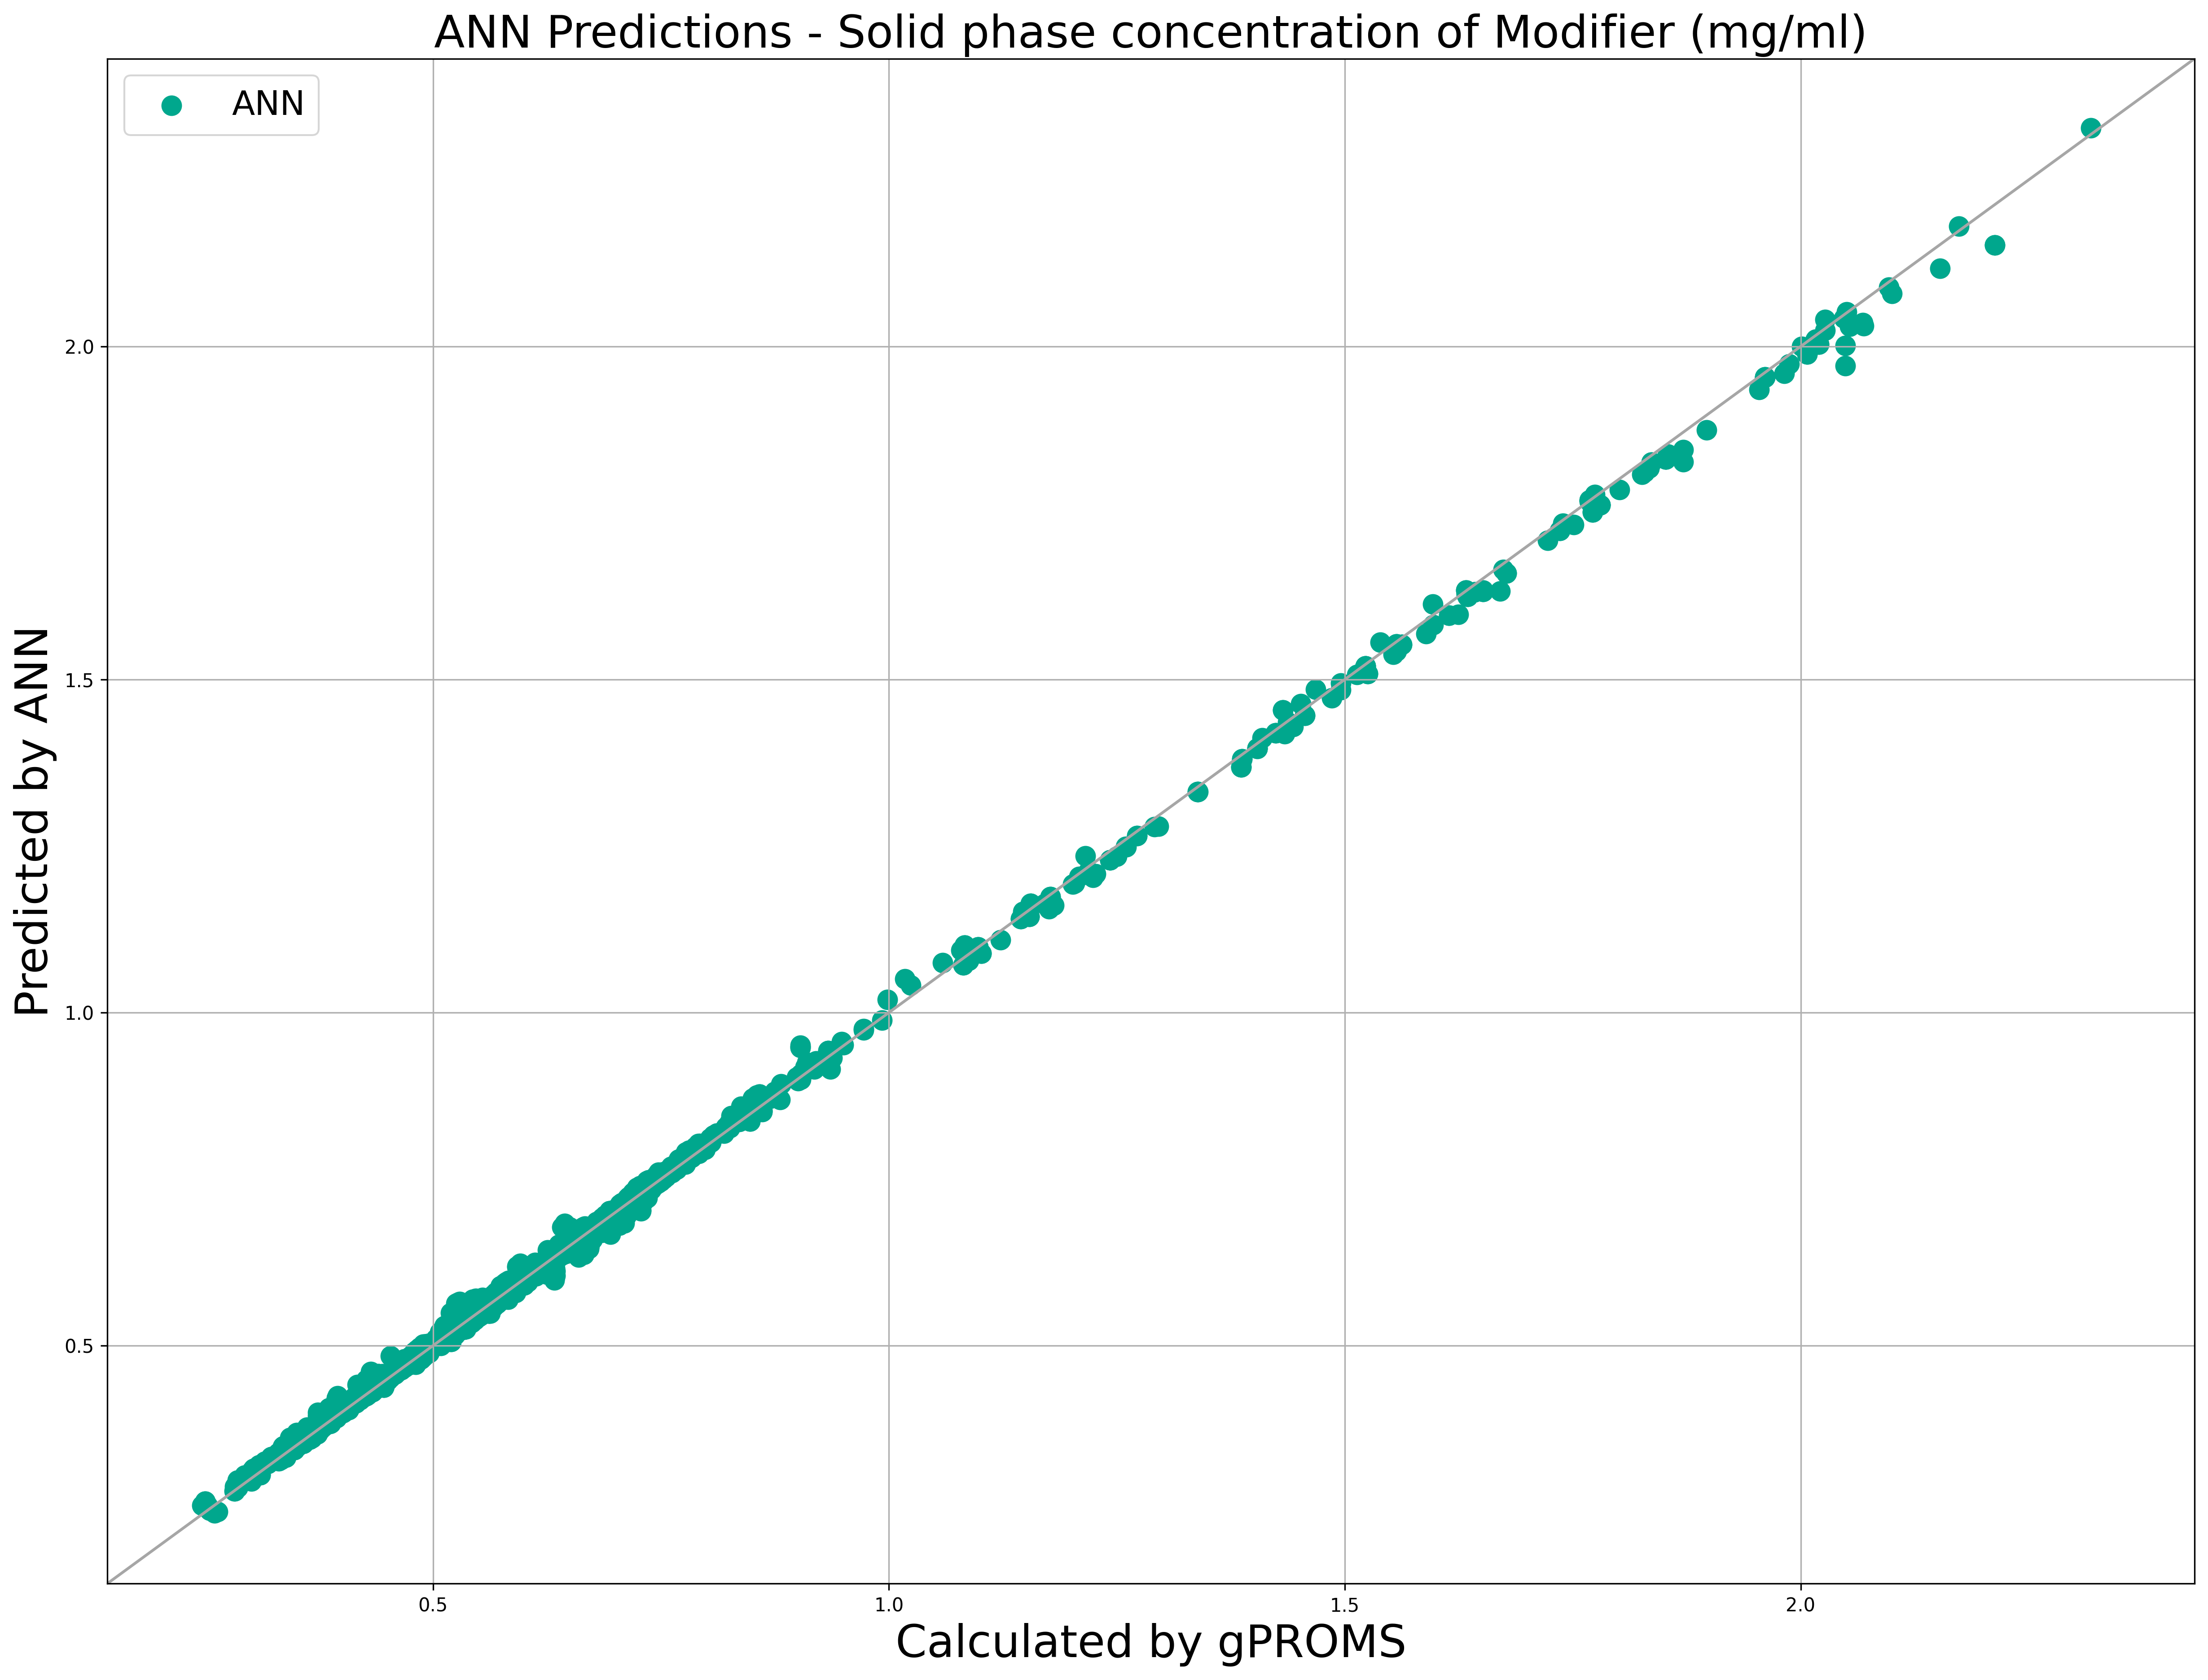

time: 50.1 s (started: 2021-06-26 17:46:18 +00:00)


In [68]:
scatter('ALL_SPC_1_1_1',0,'Solid phase concentration of Modifier (mg/ml)')

In [69]:
scatter('ALL_SPC_1_2_1',1,'Solid phase concentration of Weak Impurities (mg/ml)')

time: 58.6 s (started: 2021-06-26 17:47:09 +00:00)


In [70]:
scatter('ALL_SPC_1_3_1',2,'Solid phase concentration of Product (mg/ml)')

time: 56.9 s (started: 2021-06-26 17:48:08 +00:00)


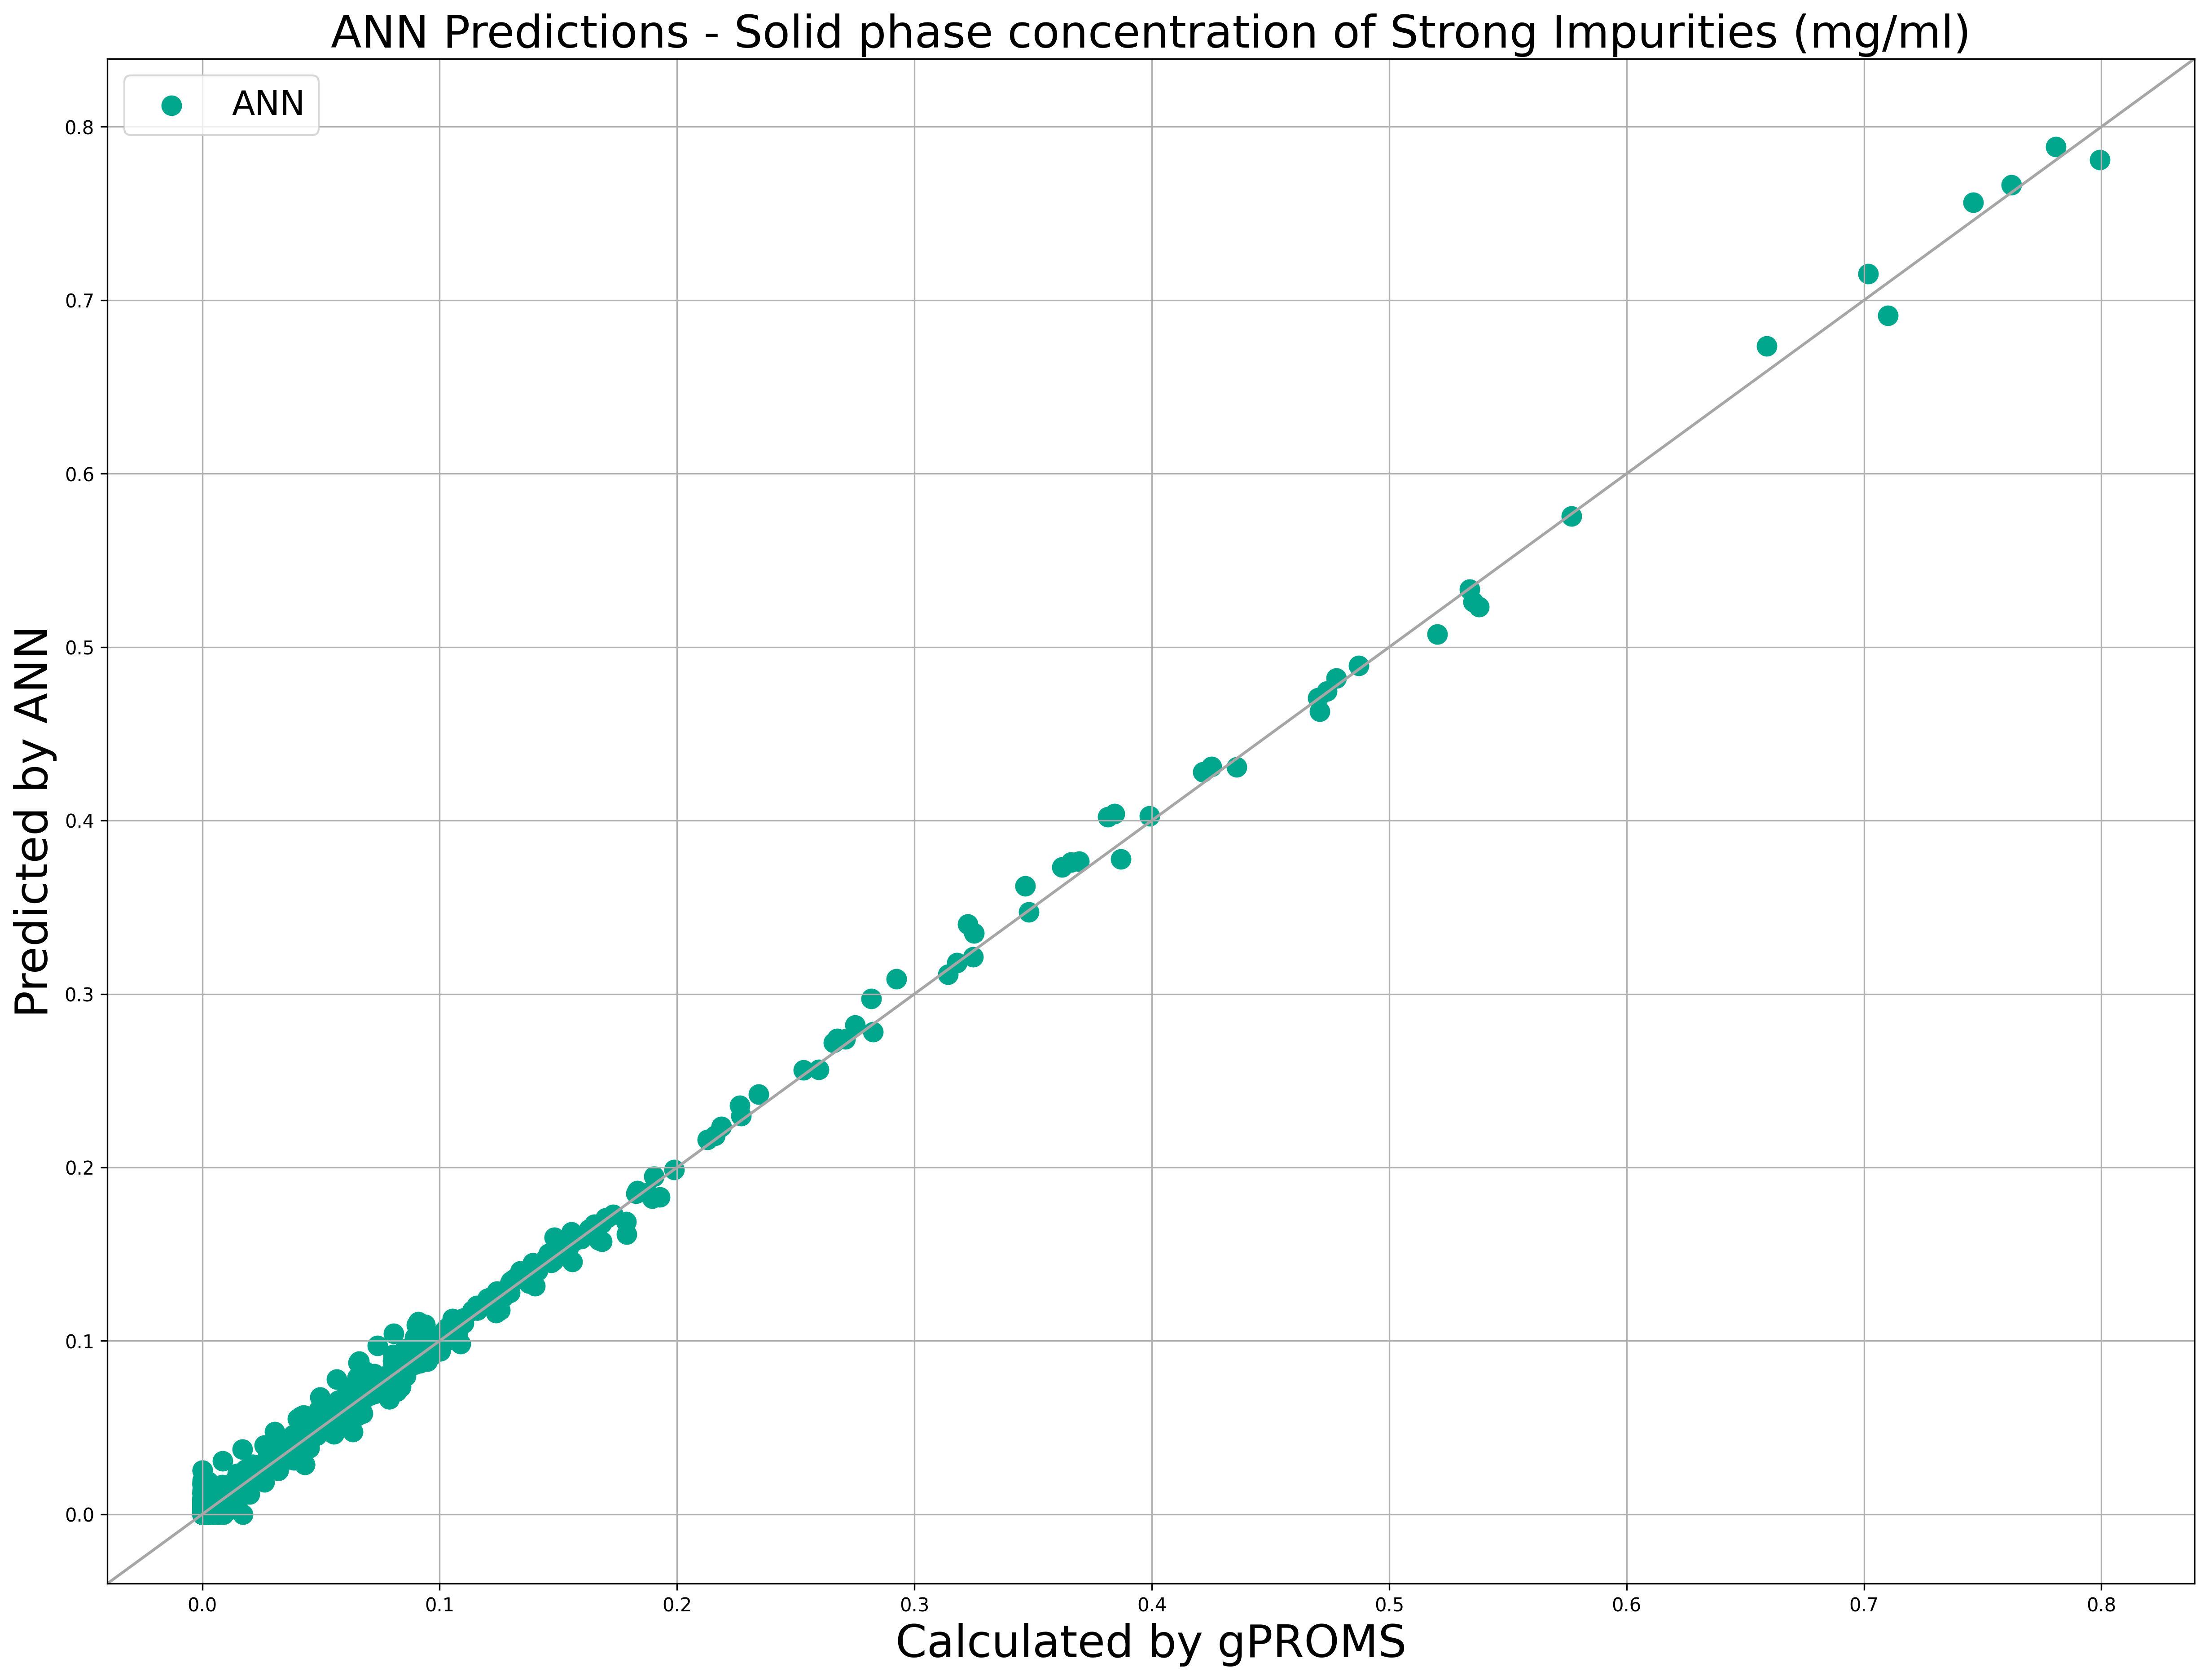

time: 58.8 s (started: 2021-06-26 17:49:05 +00:00)


In [71]:
scatter('ALL_SPC_1_4_1',3,'Solid phase concentration of Strong Impurities (mg/ml)')

### Τα scatter και για τη 2η στήλη

In [72]:
scatter('ALL_SPC_2_1_1',4,'Solid phase concentration of Modifier (mg/ml)')

time: 1min 3s (started: 2021-06-26 17:50:04 +00:00)


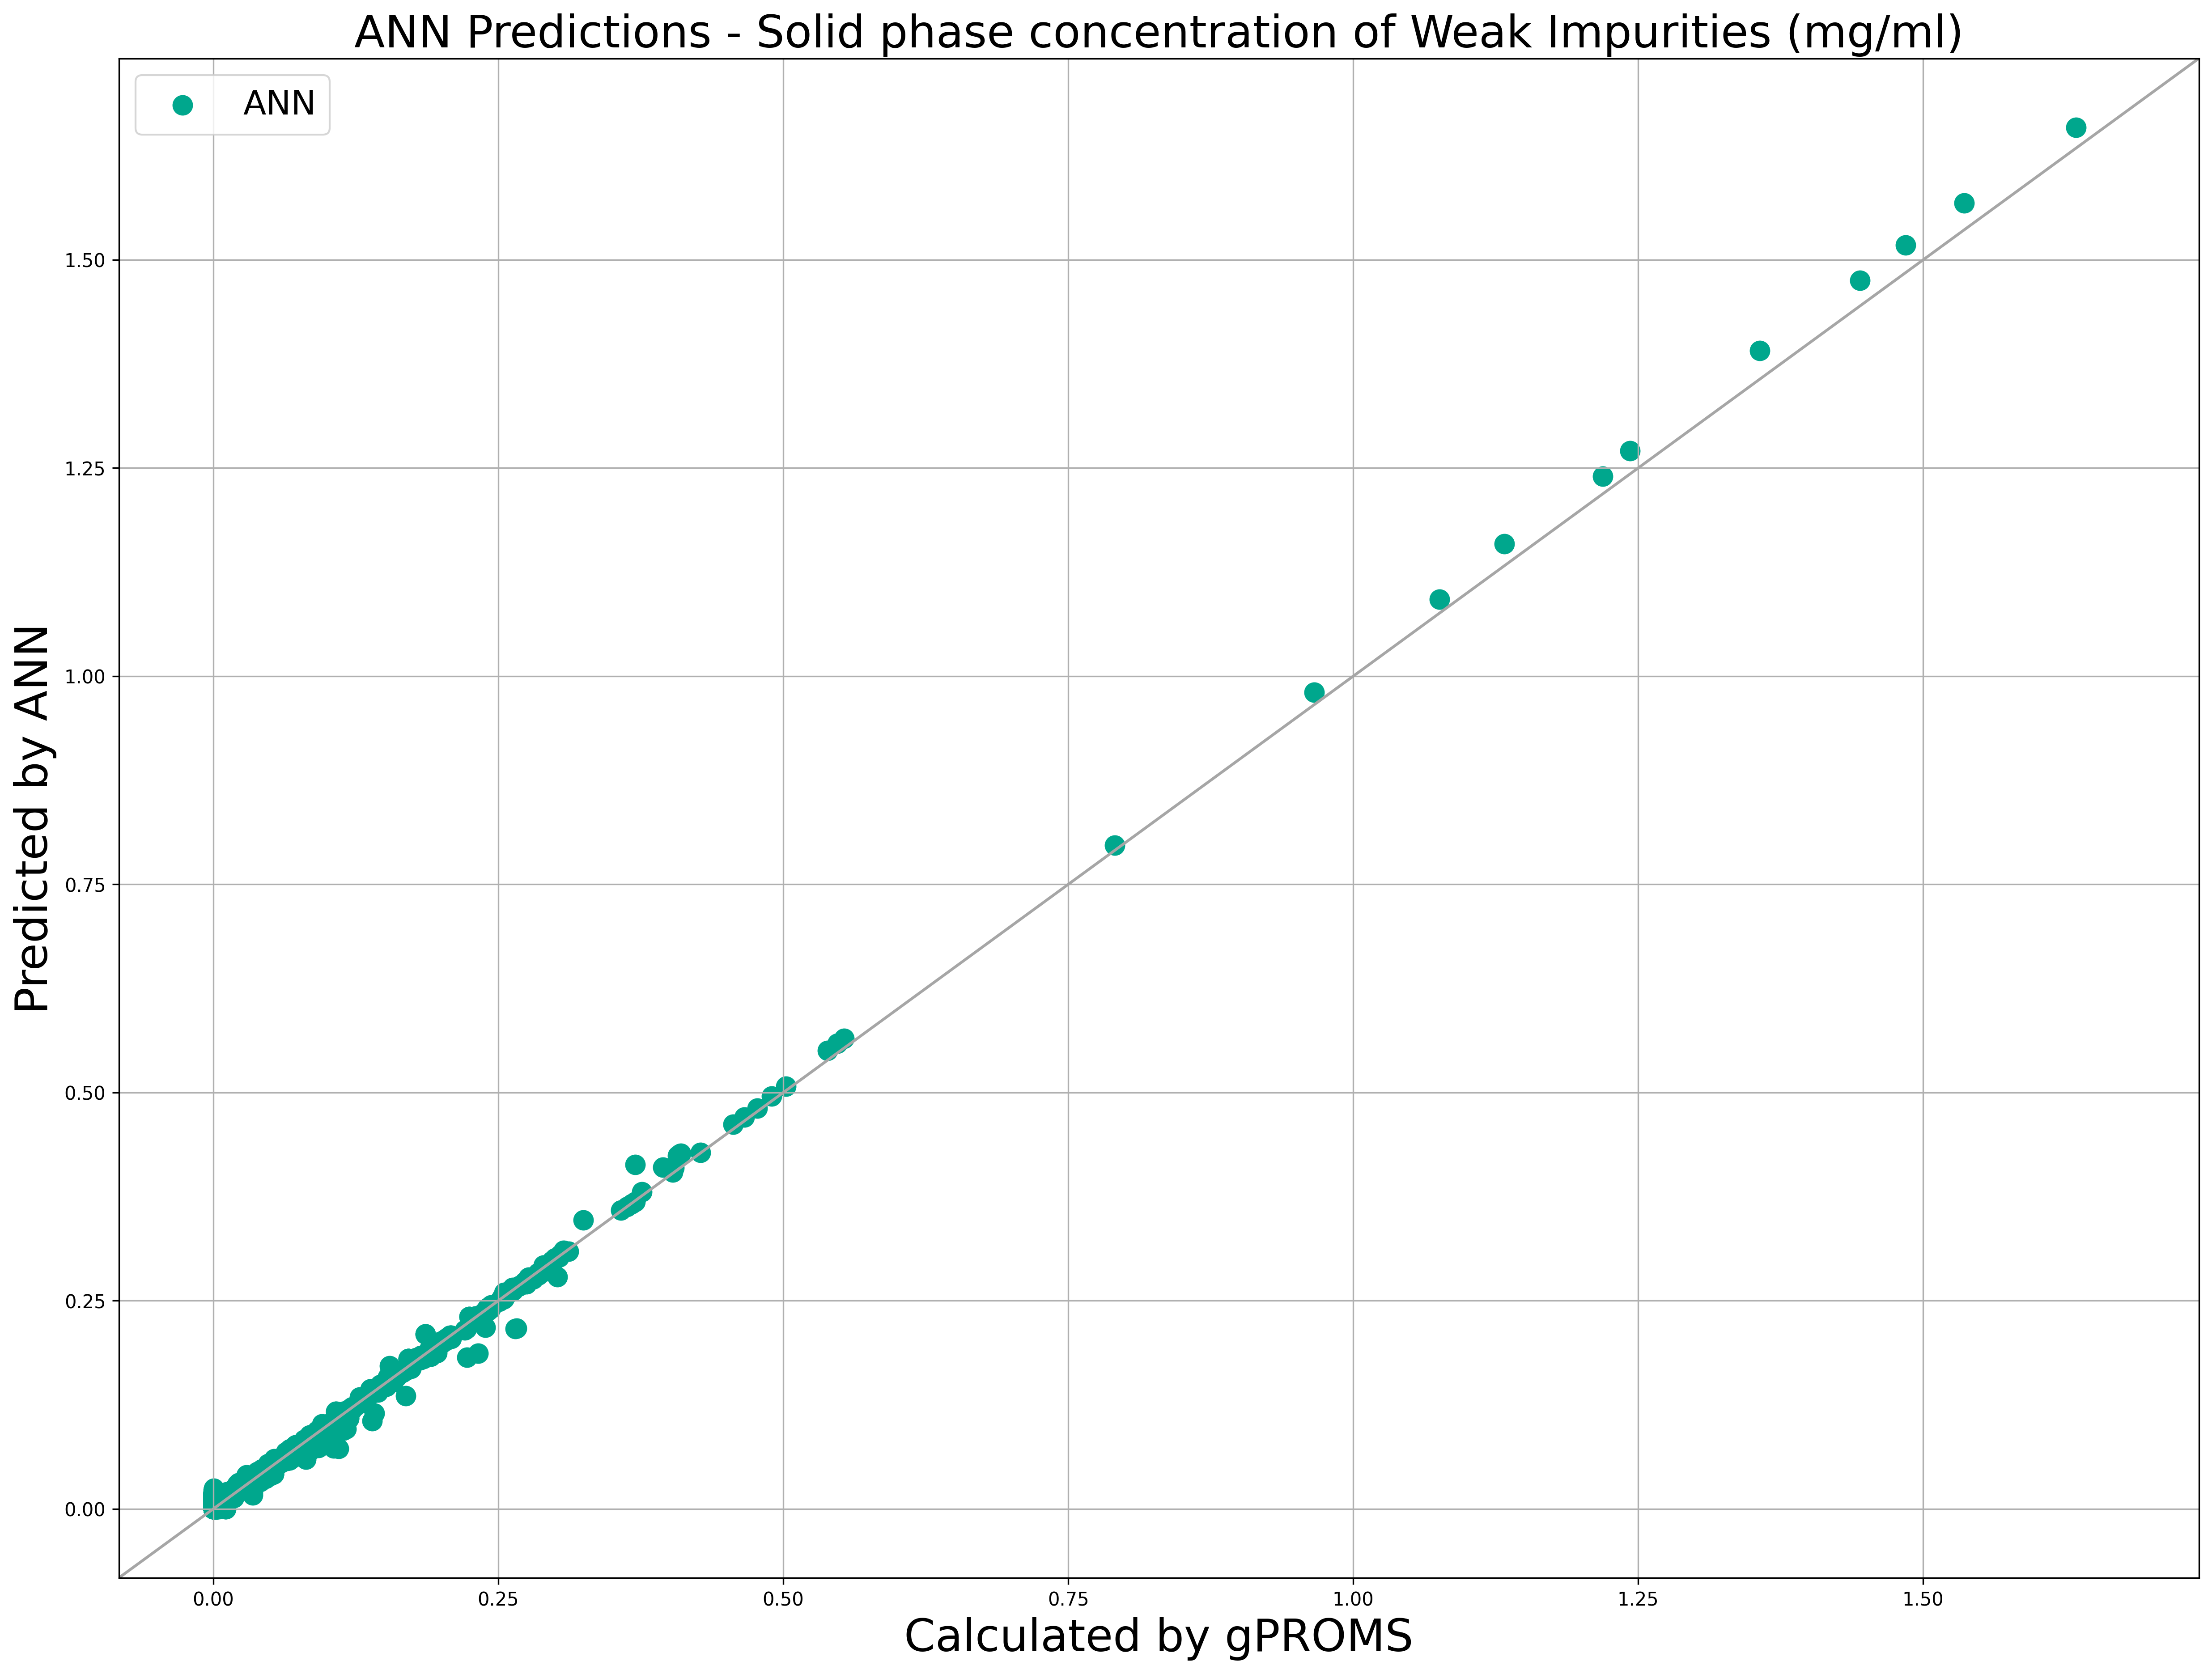

time: 1min 18s (started: 2021-06-26 17:51:08 +00:00)


In [73]:
scatter('ALL_SPC_2_2_1',5,'Solid phase concentration of Weak Impurities (mg/ml)')

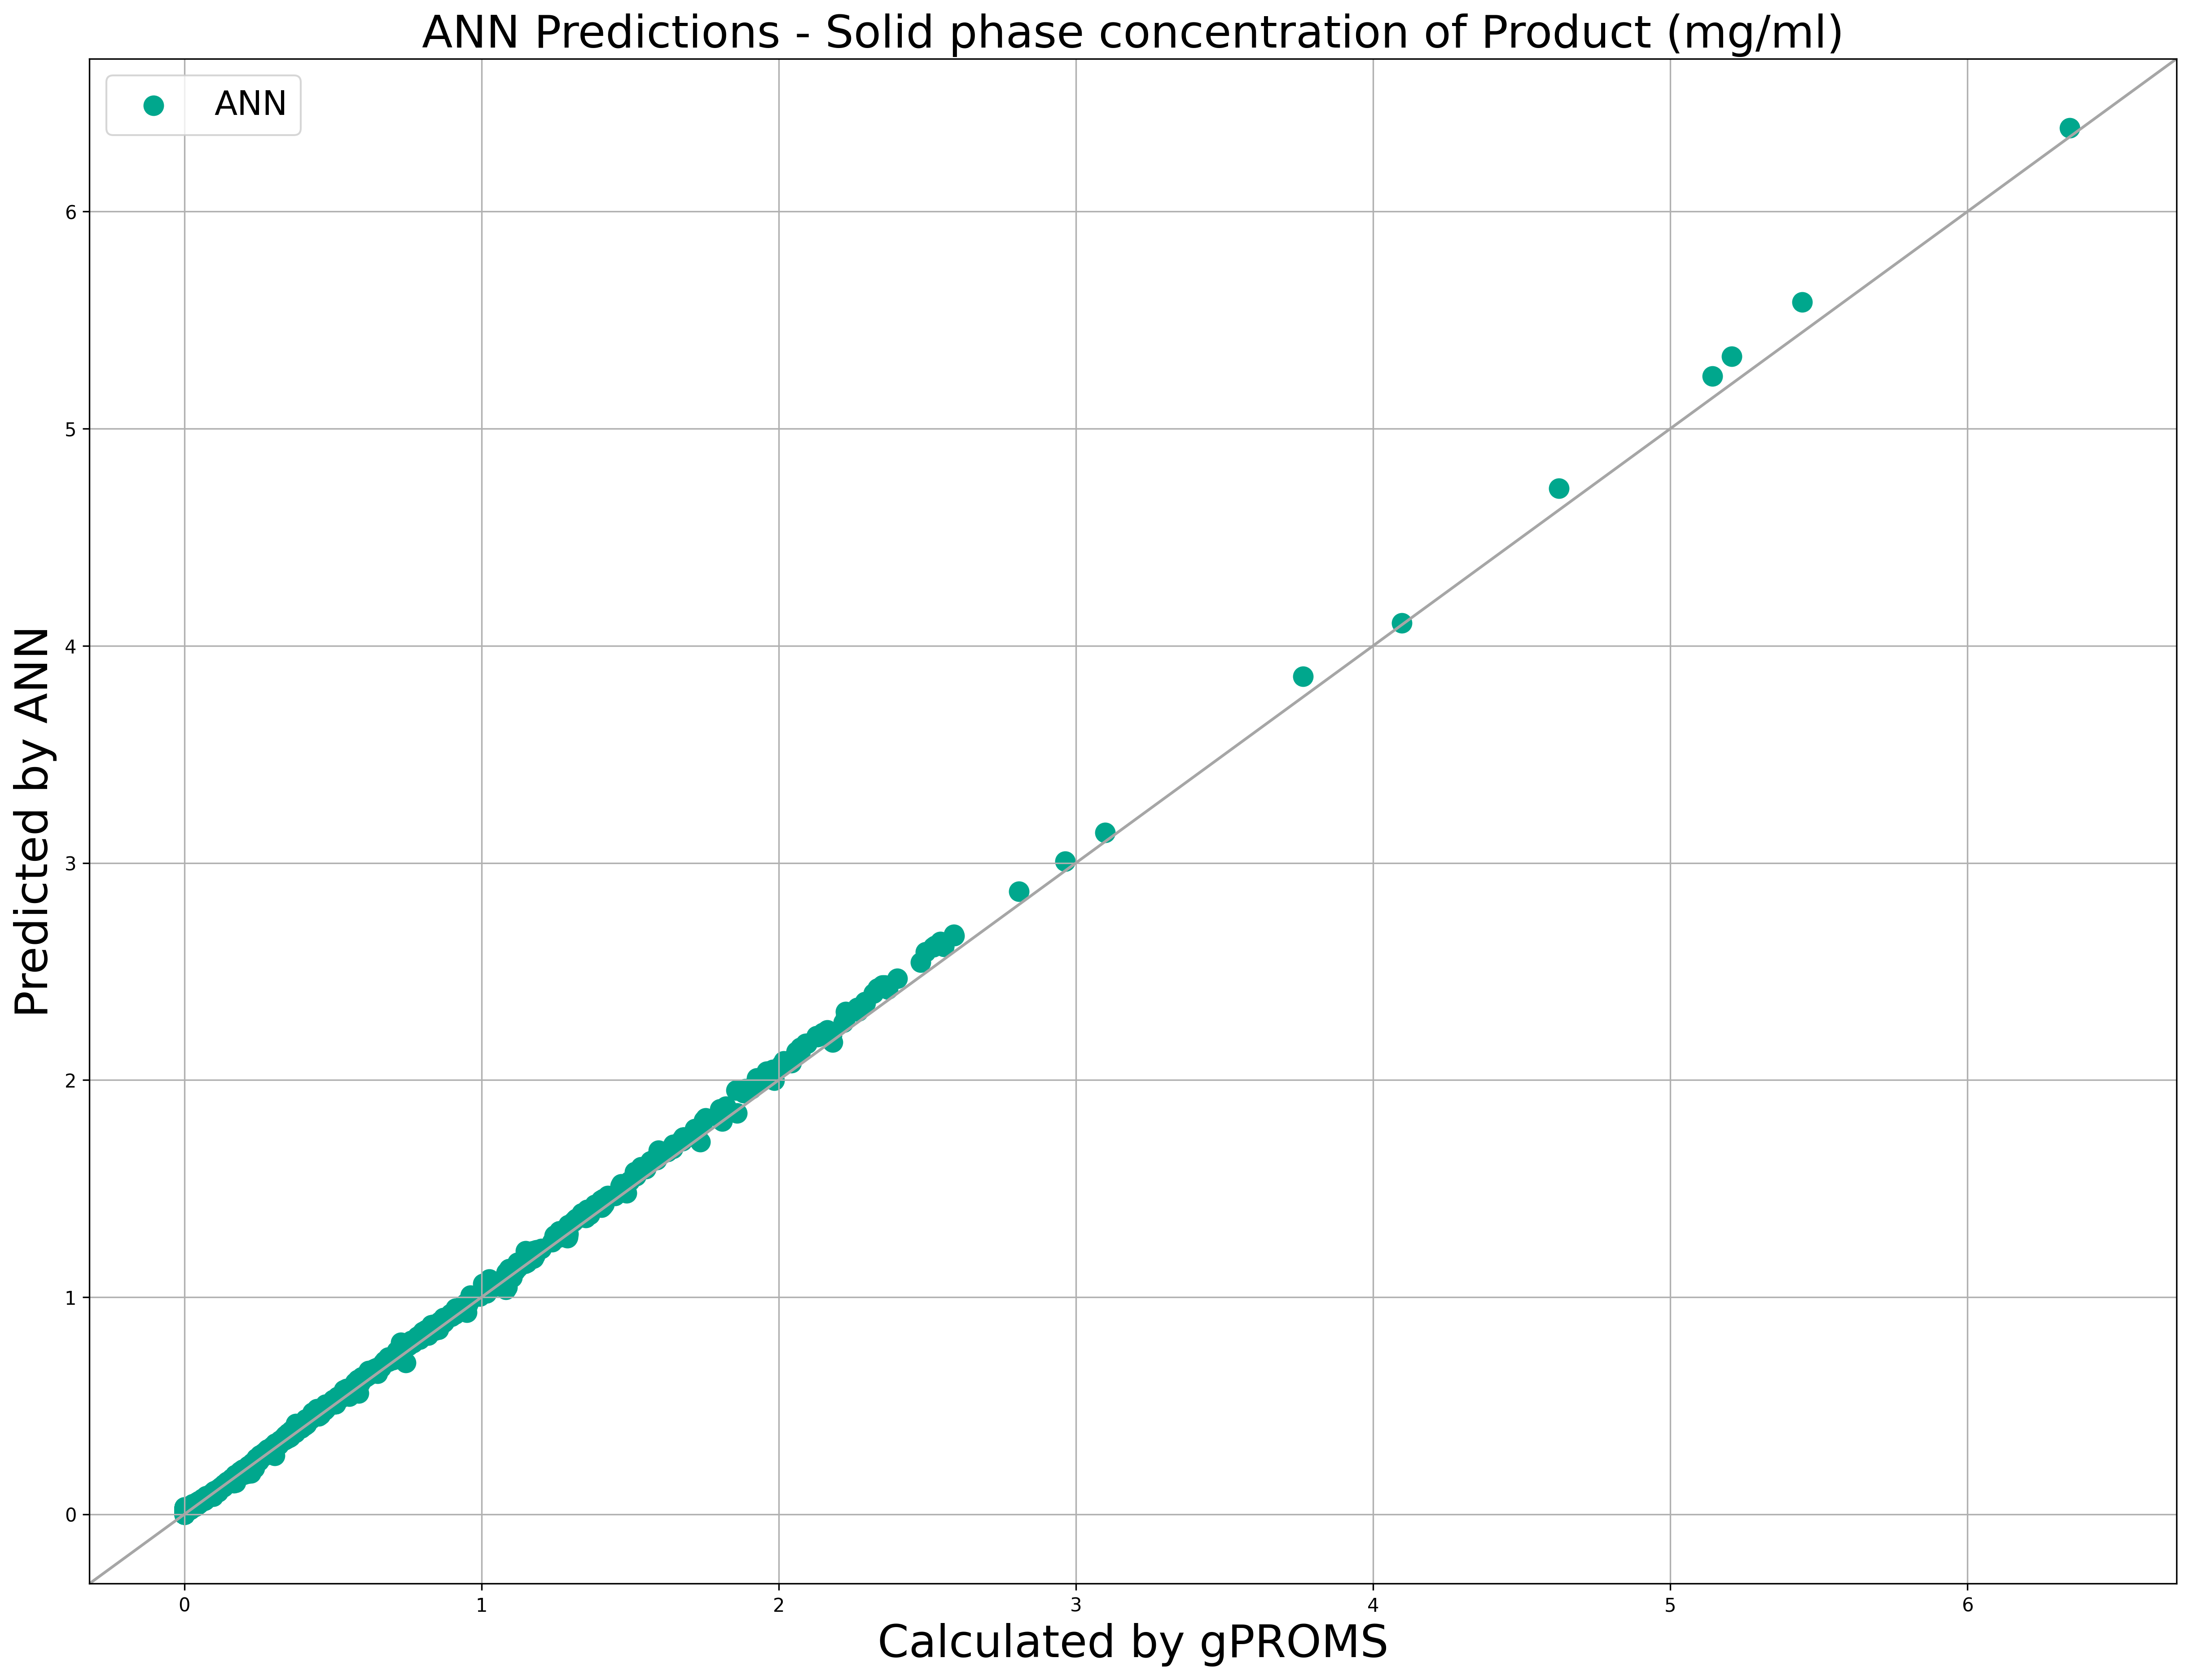

time: 59.9 s (started: 2021-06-26 17:52:26 +00:00)


In [74]:
scatter('ALL_SPC_2_3_1',6,'Solid phase concentration of Product (mg/ml)')

In [75]:
scatter('ALL_SPC_2_4_1',7,'Solid phase concentration of Strong Impurities (mg/ml)')

time: 1min 7s (started: 2021-06-26 17:53:26 +00:00)


## Μελέτη απόδοσης προβλέψεων σε τιμές `>=0,1`

In [76]:
yhat_big = yhat[yhat >= 0.1]
ytest_big = y_test[y_test >= 0.1]

time: 179 ms (started: 2021-06-26 17:54:34 +00:00)


In [77]:
def mae_big(column, number):
    df1 = ytest_big[column]
    df2 = yhat_big[number]

    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)

    rows_with_nan = [index for index, row in df1.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)

    rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)
    print(mean_absolute_error(df1[column], df2[number]),'\n')

time: 167 ms (started: 2021-06-26 17:54:35 +00:00)


In [78]:
mae_big('ALL_SPC_1_2_1',1)
mae_big('ALL_SPC_1_3_1',2)
mae_big('ALL_SPC_1_4_1',3)
mae_big('ALL_SPC_2_1_1',4)
mae_big('ALL_SPC_2_2_1',5)
mae_big('ALL_SPC_2_3_1',6)
mae_big('ALL_SPC_2_4_1',7)

0.004410340441468293 

0.020947593258538528 

0.004933544544165129 

0.004783979921870154 

0.005261596328325417 

0.022142901181824496 

0.0073386574637835005 

time: 1min 59s (started: 2021-06-26 17:54:35 +00:00)


In [79]:
def r2_big(column, number):
    df1 = ytest_big[column]
    df2 = yhat_big[number]

    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)

    rows_with_nan = [index for index, row in df1.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)

    rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)
    print(r2_score(df1[column], df2[number]),'\n')

time: 1.12 ms (started: 2021-06-26 17:56:34 +00:00)


In [80]:
r2_big('ALL_SPC_1_2_1',1)
r2_big('ALL_SPC_1_3_1',2)
r2_big('ALL_SPC_1_4_1',3)
r2_big('ALL_SPC_2_1_1',4)
r2_big('ALL_SPC_2_2_1',5)
r2_big('ALL_SPC_2_3_1',6)
r2_big('ALL_SPC_2_4_1',7)

0.9985623226297707 

0.9980025814727559 

0.9982700807576513 

0.999395737337886 

0.9980886075901452 

0.9983211175941821 

0.9960964747826799 

time: 1min 35s (started: 2021-06-26 17:56:35 +00:00)


In [81]:
results = {'ALL_SPC_1_1_1': error(ytest_big['ALL_SPC_1_1_1'], yhat_big[0]),
        'ALL_SPC_1_2_1': error(ytest_big['ALL_SPC_1_2_1'], yhat_big[1]),
        'ALL_SPC_1_3_1': error(ytest_big['ALL_SPC_1_3_1'], yhat_big[2]),
        "ALL_SPC_1_4_1": error(ytest_big['ALL_SPC_1_4_1'], yhat_big[3]),
        'ALL_SPC_2_1_1': error(ytest_big['ALL_SPC_2_1_1'], yhat_big[4]),
        'ALL_SPC_2_2_1': error(ytest_big['ALL_SPC_2_2_1'], yhat_big[5]),
        'ALL_SPC_2_3_1': error(ytest_big['ALL_SPC_2_3_1'], yhat_big[6]),
        'ALL_SPC_2_4_1': error(ytest_big['ALL_SPC_2_4_1'], yhat_big[7])}
results

{'ALL_SPC_1_1_1': 0.009477015270596528,
 'ALL_SPC_1_2_1': 0.017744693581328796,
 'ALL_SPC_1_3_1': 0.041774057580058595,
 'ALL_SPC_1_4_1': 0.02356248129734639,
 'ALL_SPC_2_1_1': 0.007964951565284819,
 'ALL_SPC_2_2_1': 0.021857865206926855,
 'ALL_SPC_2_3_1': 0.03268731816746475,
 'ALL_SPC_2_4_1': 0.03747288006226421}

time: 385 ms (started: 2021-06-26 17:58:11 +00:00)
